# **Laboratorio 5: Planteamiento y solución de problemas de optimización**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Santiago Rodríguez Quiroga
2.   David Tobón Molina

**Número del grupo**

Grupo 2

Los problemas de optimización se consituyen de seis aspectos esenciales: variables de decisión, función objetivo, región factible, restricciones, criterios de optimalidad y métodos de solución tanto analíticos como numéricos. En general, un problema de optimización se resuelve mediante métodos numéricos debido a la complejidad matemática que conlleva modelar un problema real. La mayoría de estos métodos ya vienen implementados en librerías asociadas a lenguajes de programación, por lo que, en un principio, solucionar problemas de optimización genéricos consiste en usar una librería de optimización adecuada. En Python, existen múltiples librerias de optimización. Sin embargo, la más usada y desarrollada es SciPy, la cual no solo permite resolver problemas de optimización, sino también problemas de cálculo, procesaminto de señales e imágenes, álgebra lineal, entre muchos otros. 

El plantamiento de un problema de optimización se puede dividir en dos grandes ramas; problemas lineales y no lineales, los cuales también se conocen como: programación lineal y programación no lineal. En este sentido, este laboratorio consiste en plantear, analizar y solucionar un problema lineal. Para esto, es necesaria una breve introducción teórica. Un problema de optimización se modela matemáticamente mediante una función objetivo, la cual debe mapear un espacio de $n$ dimensiones y arrojar un valor escalar, es decir, sea $f:\mathbb{R}^n \rightarrow \mathbb{R}$, luego, esta función de desea minimizar o maximizar dependiendo del contexto del problema. Encontrar un mínimo de una función, sea local o global, en general modela un problema real, debido a que esta función está sujeta a restricciones. Estas últimas se plantean con ecuaciones o inecuaciones adicionales asociadas a las variables independientes. En el caso de la programación lineal, se plantean mediante un sistema de ecuaciones o inecuaciones, de la forma:

\begin{align*}
  Ax \leq B
\end{align*}

Donde $A$ es la matriz de coeficientes, $x$ el vector de variables y $B$ el vector de restricciones. Luego, un problema de programación lineal se plantea de la forma:

\begin{align*}
  \min_x f(x)
\end{align*}

o

\begin{align*}
  \max_x f(x)
\end{align*}

Sujeto a

\begin{align*}
  Ax \leq B
\end{align*}

Además, en general, se define $x \geq 0$

# **Programación lineal**

En programación lineal, debido a su simplicidad, existen varias formas de resolver un problema de optimización. En este caso se va a trabajar con dos, una con una interpretación gráfica y otra con el uso de la función *linprog* de la librería *optimize* de *spicy*. El problema es el siguiente:

Un paciente ha sufrido un accidente que le impidió realizar ejercicio durante un año, por lo que, inevitablemente, subió de peso considerablemente. Este paciente acude al nutricionista con el objetivo de retomar el ejercicio y volver a su estado físico de antes. El paciente indica que tiene afición por tres tipos de ejercicio: montar bicicleta, ir al gimnasio y nadar, con los cuales puede consumir 300, 600 y 900 calorías por hora respectivamente. Dado que lleva mucho tiempo sin realizar ejercicio y aparte se ha recuperado de una lesión, debe cumplir ciertas restricciones:

- No puede realizar más de 4 horas de ejercicio al día
- Por disponibilidad, puede ir nadar 2 veces por semana, al gimnasio 3 veces por semana y montar bicicleta todos los días a la semana.
- El paciente tiene preferecia por el gimnasio, por lo que quiere gastar al menos un tercio del tiempo a la semana en este ejercicio
- Se le recomienda montar bibicleta al menos una hora al día para acelerar la recuperación de la lesión

Usted desea maximizar el consumo de calorias por semana.

1. Plantee el problema de optimización como un problema de programación lineal


***Escriba aquí la función objetivo, las variables de decisión con su significado y las restricciones con sus descripciones asociadas***
b: horas de montar bicicleta
g: horas en el gimnasio
n: horas de natación

\begin{align*}
  f(x) = -300b -600g -900n \enspace  sujeto \enspace a:
\end{align*}

\begin{align*}
A = \begin{pmatrix}
1 & 1 & 1 \\
1 & -2 & 1 \\
\end{pmatrix}
\end{align*}

\begin{align*}
x = \begin{bmatrix}
b \\
g \\
n
\end{bmatrix}
\end{align*}

La suma de las horas debe ser menor a 28, 4 horas semanalaes x 7 días a la semana.
Las horas de montar bicileta deben de ser mínimo 1 hora diaria: 1 hora x 7 días a la semana.
Las horas de gimnasio deben ser un tercio de las horas de ejercicio semanales.
Las 2 últimas condiciones son escritas con signos negativos para que se cumpla la igualdad Ax ≤ B.

\begin{align*}
B = \begin{bmatrix}
4 \\
0 \\
\end{bmatrix}
\end{align*}

\begin{align*}
x \geq 0
\end{align*}

\begin{align*}
Ax \leq B
\end{align*}

\begin{align*}
c = [-300, -600, -900]
\end{align*}


1. Resuelva el problema usando la función *linprog* de la librería optimize con método simplex

In [9]:
from scipy.optimize import linprog, minimize, LinearConstraint
import numpy as np

lim_bici = (1, None)
lim_gym = (0, None)
lim_nat = (0, None)
A = np.array([[1, 1, 1], [1, -2, 1]])
B = np.array([4, 0])
  
def intento1(A, B, lim_bici, lim_gym, lim_nat):
     
     obj = np.array([300, 600, 900])
     return linprog(c=-obj, A_ub=A, b_ub=B, bounds=(lim_bici, lim_gym, lim_nat), method='simplex')

print("Intento 1:", intento1(A, B, lim_bici, lim_gym, lim_nat))


Intento 1:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -2600.0
       x: [ 1.000e+00  1.333e+00  1.667e+00]
     nit: 3


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16380\524065630.py:13: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  return linprog(c=-obj, A_ub=A, b_ub=B, bounds=(lim_bici, lim_gym, lim_nat), method='simplex')


2. Resuelva el problema pero ahora usando la función *minimize* de la librería *optimize*. Esta función requiere una condición inicial, escójala de forma que cumpla las restricciones.



In [10]:
def funcion(args):
    b, g, n = args
    return -300*b - 600*g - 900*n

constraint = LinearConstraint(A, lb=[0,0], ub=[4, 0])
condicion_inicial = [2, 1, 0]

print(minimize(funcion, condicion_inicial, bounds=(lim_bici, lim_gym, lim_nat), constraints=constraint))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2600.0002303116653
       x: [ 1.000e+00  1.333e+00  1.667e+00]
     nit: 3
     jac: [-3.000e+02 -6.000e+02 -9.000e+02]
    nfev: 9
    njev: 2


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_constraints.py:525: OptimizeWarning: Equality and inequality constraints are specified in the same element of the constraint list. For efficient use with this method, equality and inequality constraints should be specified in separate elements of the constraint list. 
  warn("Equality and inequality constraints are specified in the same "


3. Verifique que la solución cumple las restricciones.

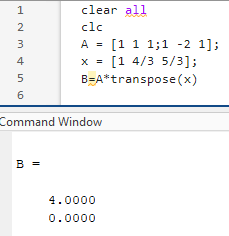

In [20]:
x = np.array([1,4/3,5/3])
verificacion = np.dot(A,x)
print(verificacion)

[4.00000000e+00 2.22044605e-16]


4. Encuentre los demás puntos que cumplen las restricciones.

Ayuda: el número de puntos que cumplen las restriciones se calcula mediante la fórmula:

\begin{align*}
  \frac{n!}{m!(n-m)!}
\end{align*}

Donde $n$ es el número de variables y $m$ el número de restricciones

5. Evalue la función objetivo en los puntos hallados y verifique que el encontrado mediante *linprog* y *minimize* sí es el óptimo

6. Compare el método por *linprog* y *minimize*. Verifique el número de iteraciones, ¿cuál es el más preciso?, ¿cuál es más eficiente?